initProb is 0.1


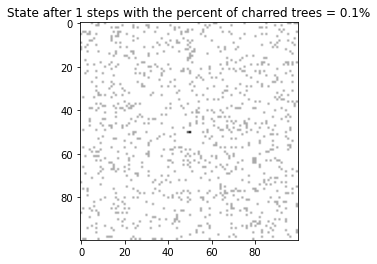

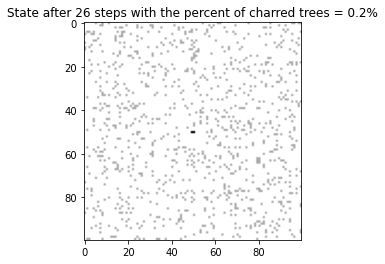

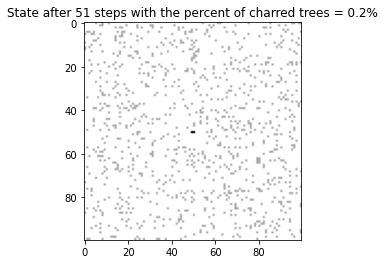

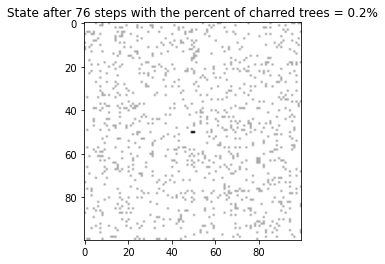

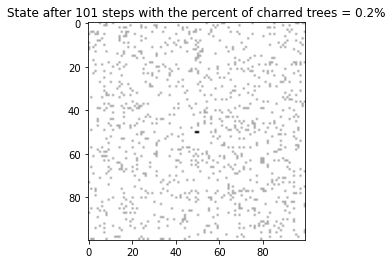

initProb is 0.2


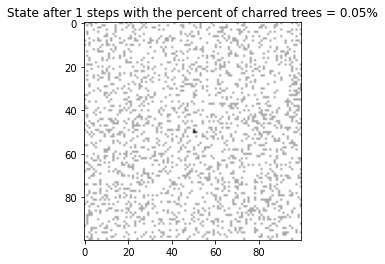

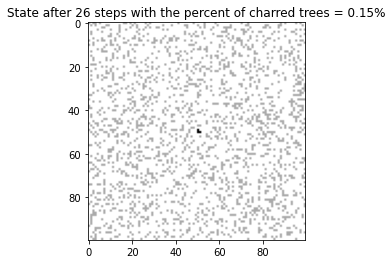

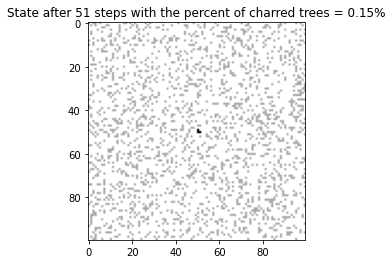

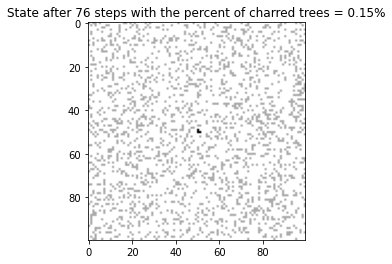

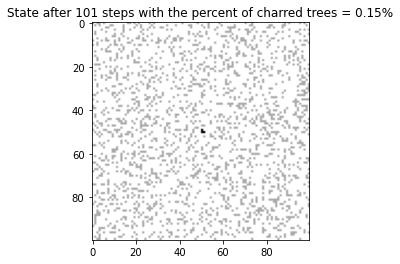

initProb is 0.3


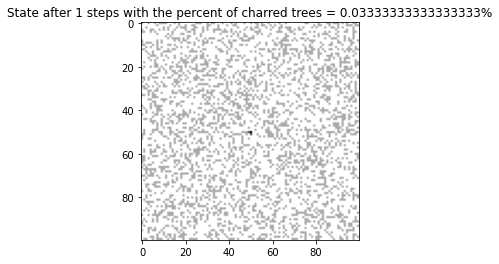

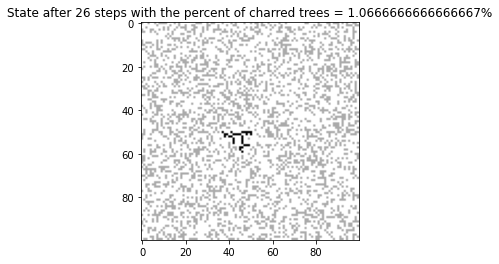

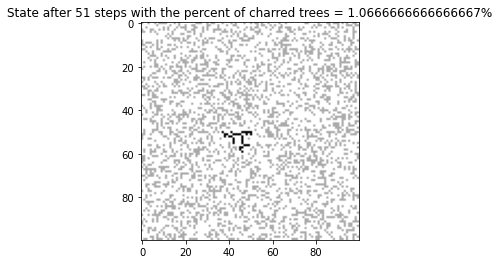

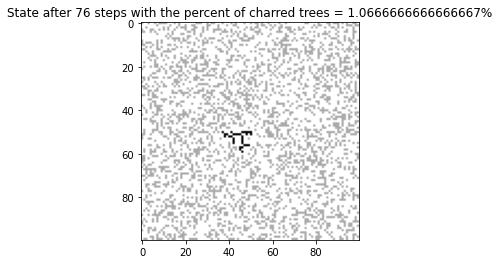

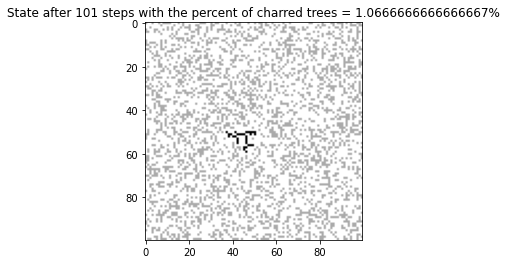

initProb is 0.4


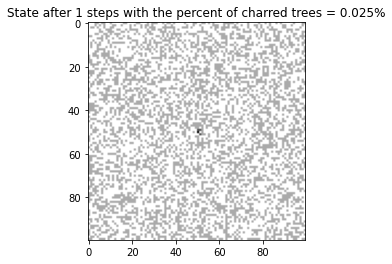

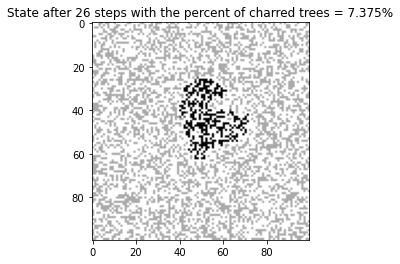

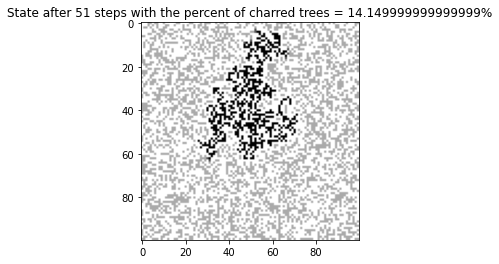

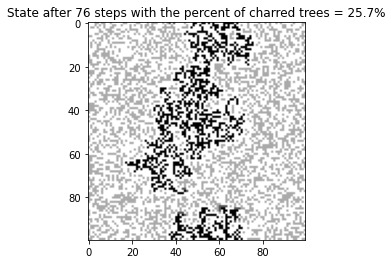

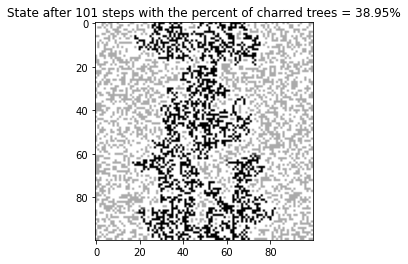

initProb is 0.5


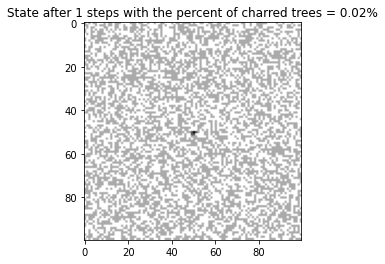

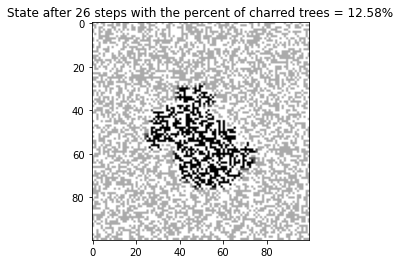

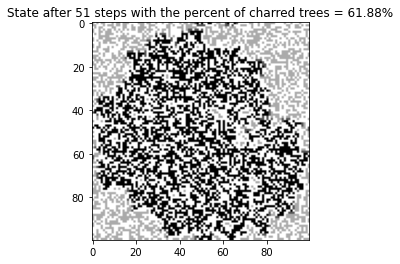

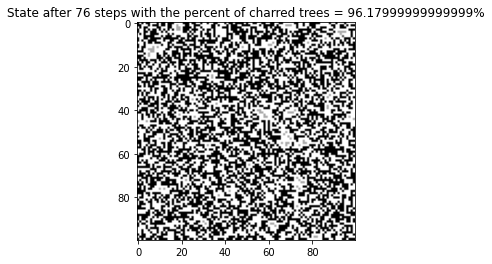

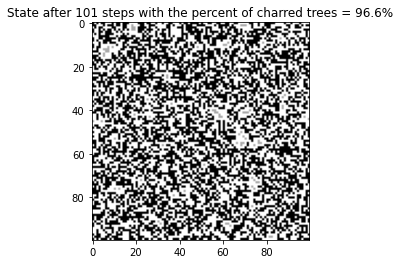

initProb is 0.6


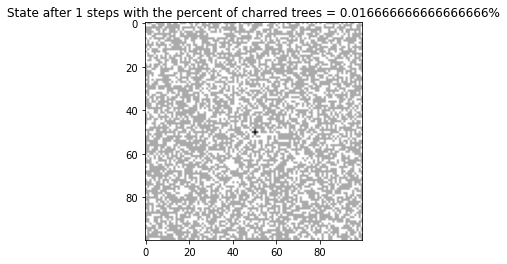

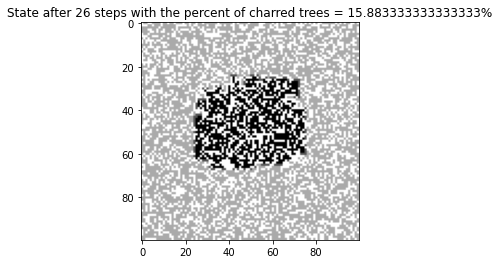

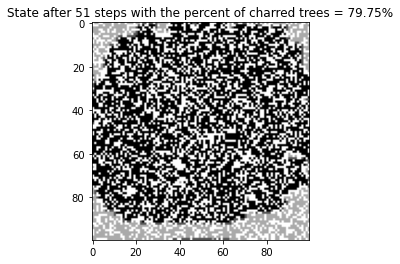

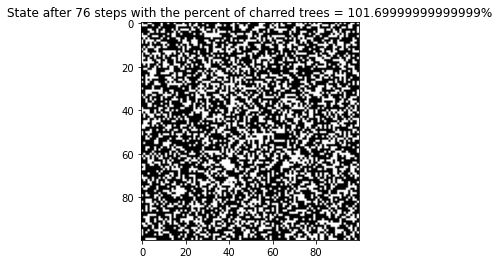

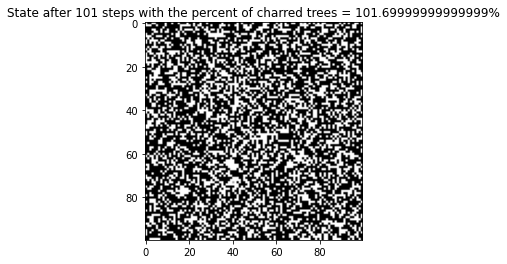

initProb is 0.7


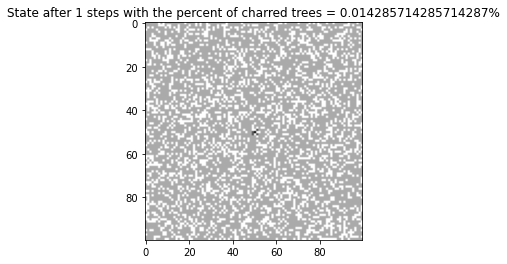

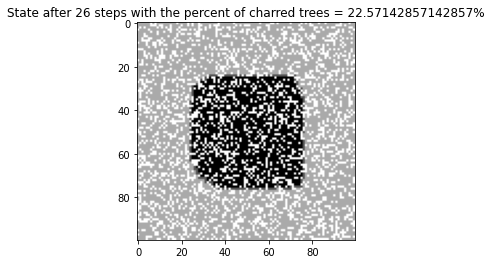

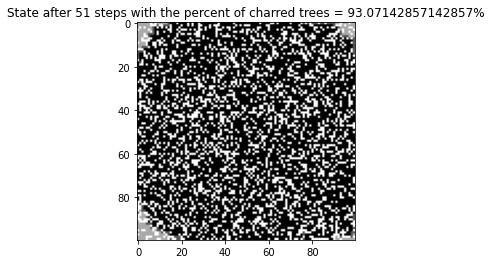

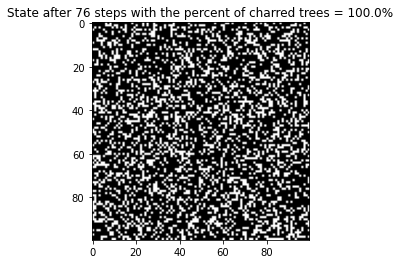

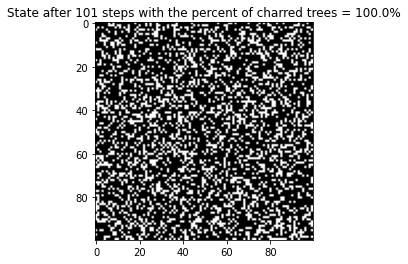

initProb is 0.8


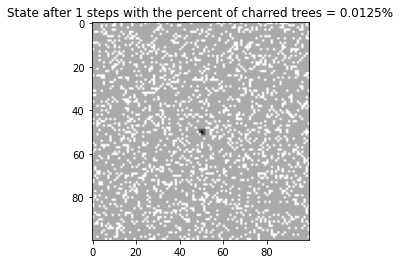

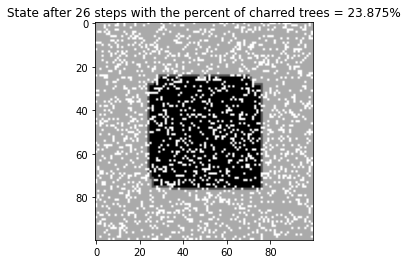

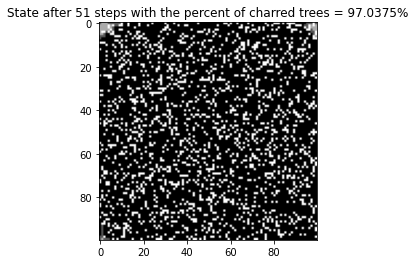

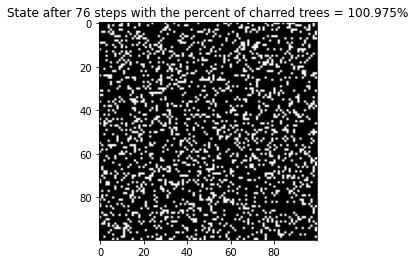

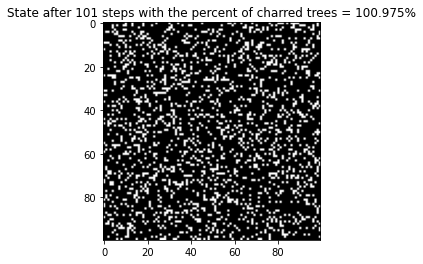

In [4]:
# Sayama 11.9

# Simple CA simulator in Python
#
# *** Forest fire ***
#
# Copyright 2008-2012 Hiroki Sayama
# sayama@binghamton.edu

# Modified to run with Python 3

import matplotlib
%matplotlib inline

import pylab as PL
import random as RD
import scipy as SP
import numpy as NP

RD.seed()

width = 100
height = 100
initProb = 0.4
empty, tree, fire, char = range(4)

steps = 10

def init():
    global time, config, nextConfig, current_step, current_density

    time = 0

    config = NP.zeros([height, width])
    for x in range(width):
        for y in range(height):
            if RD.random() < initProb:
                state = tree
            else:
                state = empty
            config[y, x] = state
    config[height//2, width//2] = fire

    nextConfig = NP.zeros([height, width])
    
    current_step = 1
    current_density = 0

def draw():
    global time, config, nextConfig, current_step, current_density
    
    PL.cla()
    #PL.pcolor(config, vmin = 0, vmax = 3, cmap = PL.cm.binary)
    #PL.axis('image')
    #PL.title('t = ' + str(time))
    PL.imshow(config, vmin = 0, vmax = 3, cmap = PL.cm.binary)
    PL.title(f'State after {current_step} steps with the percent of charred trees = {(current_density/(100*100*initProb))*100}%')
    PL.show()
    current_step += 25

def step():
    global time, config, nextConfig, current_step, current_density

    time += 1
    current_density = 0

    for x in range(width):
        for y in range(height):
            state = config[y, x]
            if state == fire:
                state = char
            elif state == tree:
                for dx in range(-1, 2):
                    for dy in range(-1, 2):
                        if config[(y+dy)%height, (x+dx)%width] == fire:
                            state = fire
            nextConfig[y, x] = state
            
            current_density = current_density + 1 if nextConfig[x, y] == char else current_density

    config, nextConfig = nextConfig, config


probabilities = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
for initProb in probabilities:
    print(f'initProb is {initProb}')
    init()
    for i in range(101):
        step()
        if i%25 == 0:
            draw()

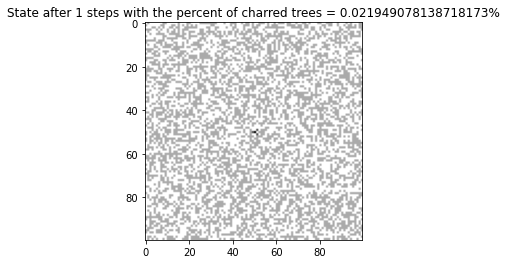

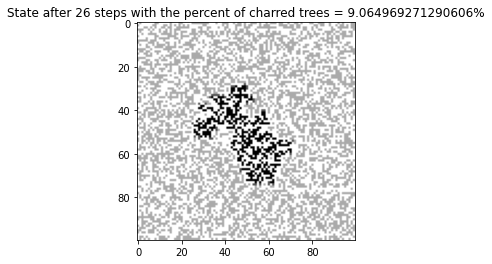

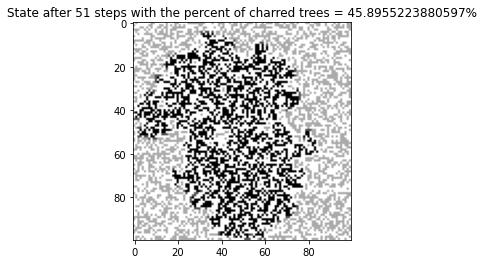

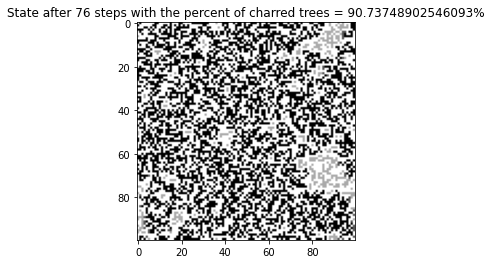

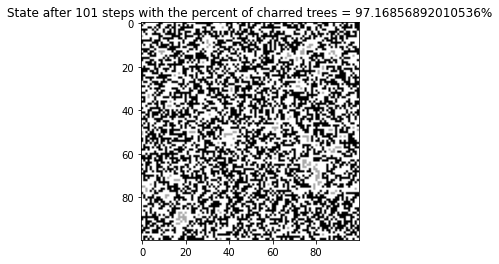

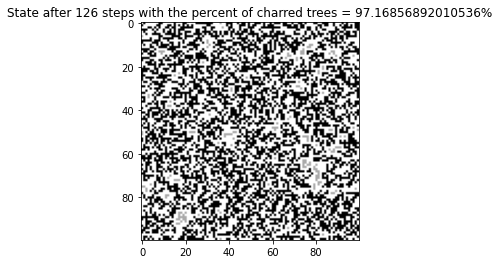

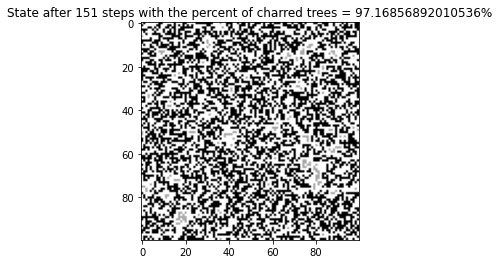

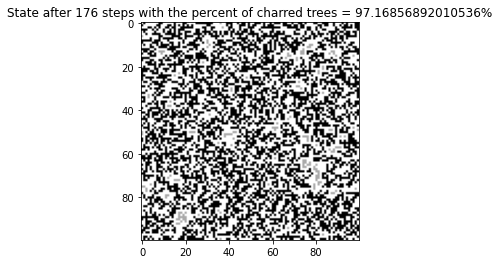

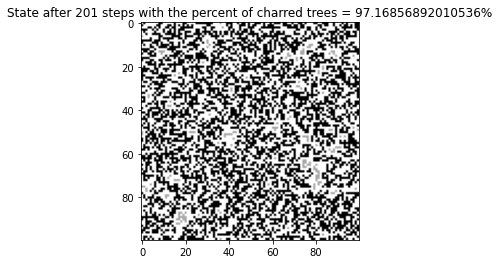

In [2]:
initProb = 0.4556 # trying out the threshold that initially seemed to tip the balance from the small fire to a big one
init()
for i in range(201):
    step()
    if i%25 == 0:
        draw()

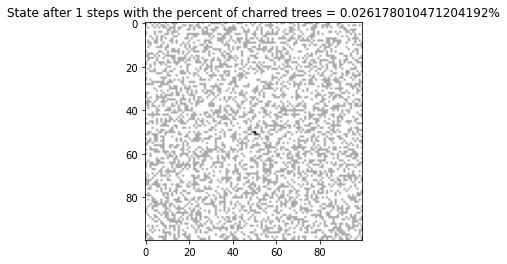

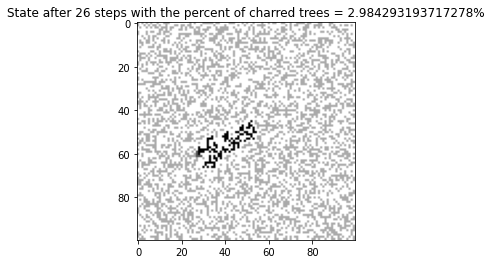

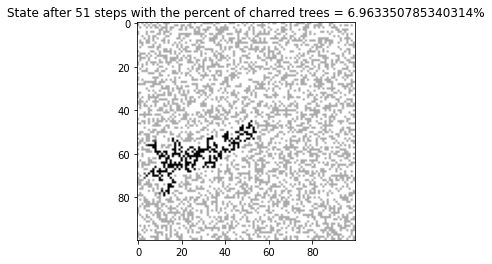

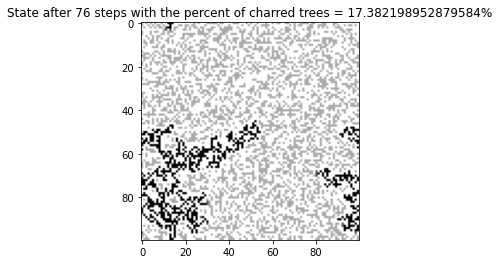

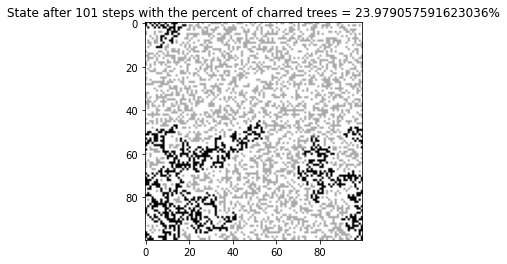

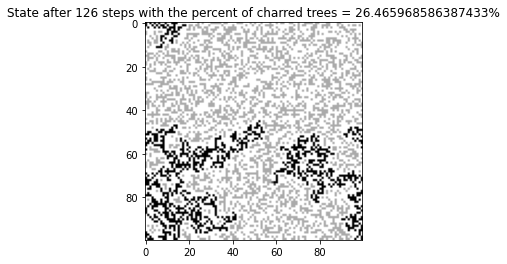

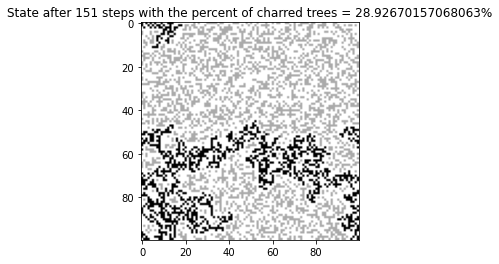

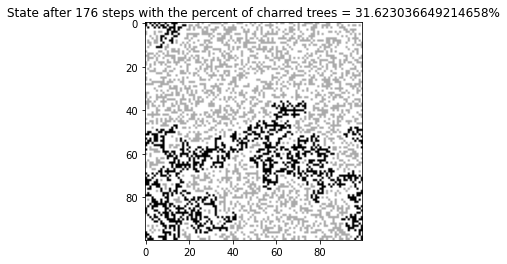

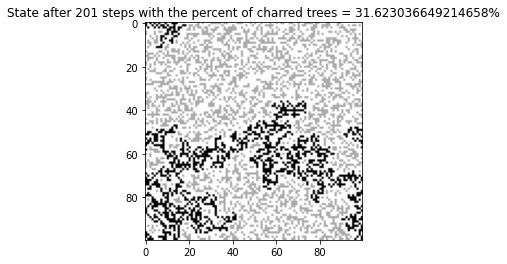

In [3]:
initProb = 0.382 # testing the value from Sayama 12.4
init()
for i in range(201):
    step()
    if i%25 == 0:
        draw()

### Sayama 12.8

It is not correct to assume so.

The formula for percolation (or whatever parameter of interest that is) at a given level must encompass the probabilities of each of the scenarios when the phenomenon of interest (in this case - the fire gets transmitted from one side to another) occurs. If we simply copy the scenarios from the previous level, then we only get simplistic symmetric scenarios on the current: however, the number of scenarios of interest on the current level is actually much higher and encompasses many assymetric scenarios as well. Therefore, in simply copying scenarios from the previous level we do not account for all the other relevant scenarios that may cause phenomenon to occur on the current level, and miss out on a large chunk of probability of the parameter that we are trying to estimate on this level.